# Reto plan de inversión Competencia 6 Sub 3

In [38]:
import pandas as pd
import numpy as np

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!find "/content/drive/My Drive/Colab Notebooks/B6M3" -name "*.csv"

/content/drive/My Drive/Colab Notebooks/B6M3/german_credit_SC63.csv
/content/drive/My Drive/Colab Notebooks/B6M3/3.4.-california_total_bedrooms.csv
/content/drive/My Drive/Colab Notebooks/B6M3/1707517891642-titanic.csv
/content/drive/My Drive/Colab Notebooks/B6M3/facebook_likes.csv
/content/drive/My Drive/Colab Notebooks/B6M3/bank_marketing.csv


# Análisis exploratorio

In [41]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/B6M3/bank_marketing.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [42]:
data.shape

(9000, 17)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [44]:
data.nunique()

,0
age,74
job,12
marital,3
education,4
default,2
balance,3476
housing,2
loan,2
contact,3
day,31


# Transformación

## Categóricas

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Creamos una copia de seguridad del dataset original
data_transformed = data.copy()

# 1. Aplicamos LabelEncoder a la variable 'month' que tiene un orden implícito
label_encoder = LabelEncoder()
data_transformed['month'] = label_encoder.fit_transform(data_transformed['month'])

# 2. Variables categóricas sin orden (aplicamos OneHotEncoder)
# Seleccionamos las columnas categóricas restantes
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Aplicamos OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' para evitar multicolinealidad
encoded_data = onehot_encoder.fit_transform(data_transformed[categorical_columns])

# Convertimos el resultado a un DataFrame con los nombres de las nuevas columnas
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Eliminamos las columnas categóricas originales y unimos las nuevas variables codificadas
data_transformed = pd.concat([data_transformed.drop(columns=categorical_columns), encoded_df], axis=1)

# Verificamos el nuevo DataFrame transformado
data_transformed.head()



,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,31,2666,10,9,318,2,97,6,yes,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29,1584,6,11,245,1,-1,0,yes,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,2152,17,9,369,1,-1,0,no,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,50,84,17,5,18,8,-1,0,no,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,0,28,5,496,2,182,11,yes,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9000 non-null   int64  
 1   balance              9000 non-null   int64  
 2   day                  9000 non-null   int64  
 3   month                9000 non-null   int64  
 4   duration             9000 non-null   int64  
 5   campaign             9000 non-null   int64  
 6   pdays                9000 non-null   int64  
 7   previous             9000 non-null   int64  
 8   y                    9000 non-null   object 
 9   job_blue-collar      9000 non-null   float64
 10  job_entrepreneur     9000 non-null   float64
 11  job_housemaid        9000 non-null   float64
 12  job_management       9000 non-null   float64
 13  job_retired          9000 non-null   float64
 14  job_self-employed    9000 non-null   float64
 15  job_services         9000 non-null   f

In [47]:
# Transformamos la variable 'y' en binaria (1 para 'yes' y 0 para 'no')
data_transformed['y'] = data_transformed['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Reorganizamos las columnas para mover 'y' al final
# Obtenemos la lista de columnas, excluyendo 'y', y luego añadimos 'y' al final
cols = [col for col in data_transformed.columns if col != 'y'] + ['y']

# Reorganizamos el DataFrame
data_transformed = data_transformed[cols]

# Verificamos el DataFrame
data_transformed.head()


,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,31,2666,10,9,318,2,97,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,29,1584,6,11,245,1,-1,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,41,2152,17,9,369,1,-1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,50,84,17,5,18,8,-1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,40,0,28,5,496,2,182,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


## Numéricas

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Incluimos 'month' en la lista de variables numéricas
numerical_columns = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

# Creamos un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicamos el escalado solo a las columnas numéricas seleccionadas
data_transformed[numerical_columns] = scaler.fit_transform(data_transformed[numerical_columns])

# Verificamos los resultados después de la normalización
data_transformed[numerical_columns].head()



,age,balance,day,month,duration,campaign,pdays,previous
0,0.168831,0.067931,0.300000,0.818182,0.096923,0.017544,0.115159,0.103448
1,0.142857,0.055090,0.166667,1.000000,0.074462,0.000000,0.000000,0.000000
2,0.298701,0.061831,0.533333,0.818182,0.112615,0.000000,0.000000,0.000000
3,0.415584,0.037288,0.533333,0.454545,0.004615,0.122807,0.000000,0.000000
4,0.285714,0.036292,0.900000,0.454545,0.151692,0.017544,0.215041,0.189655


# Partición de los datos

In [51]:
from sklearn.model_selection import train_test_split

# Dividimos las variables de entrada (X) y la variable de salida (y)
X = data_transformed.drop(columns=['y'])  # Todas las variables excepto 'y'
Y = data_transformed['y']  # La variable de salida 'y'

# División inicial: 60% para entrenamiento y 40% para validación + prueba
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=0.60, random_state=42)

# División secundaria: 50% para validación y 50% para prueba (dentro del 20% restante)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=0.50, random_state=42)

# Verificamos los tamaños de los conjuntos
print(f"Conjunto de entrenamiento: {x_train.shape}")
print(f"Conjunto de validación: {x_validation.shape}")
print(f"Conjunto de prueba: {x_test.shape}")


Conjunto de entrenamiento: (5400, 32)
Conjunto de validación: (1800, 32)
Conjunto de prueba: (1800, 32)


# Creación de modelos

## Regresión logística

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Inicializamos el modelo de Regresión Logística
logreg = LogisticRegression(C=1.0, solver='newton-cg', max_iter=1000, random_state=42)

# Entrenamos el modelo con el conjunto de entrenamiento
logreg.fit(x_train, y_train)

# Hacemos predicciones en el conjunto de validación
y_pred_val = logreg.predict(x_validation)

# Evaluamos el modelo con una matriz de confusión y la precisión
conf_matrix = confusion_matrix(y_validation, y_pred_val)
accuracy = accuracy_score(y_validation, y_pred_val)

# Mostramos los resultados
print("Matriz de Confusión (Validación):")
print(conf_matrix)
print(f"\nPrecisión (Validación): {accuracy:.4f}")


Matriz de Confusión (Validación):
[[931 127]
 [237 505]]

Precisión (Validación): 0.7978


### Prueba con diferentes hiperparámetros

In [53]:
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros a ajustar
parameters = {
    'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
    'penalty': ['l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'saga', 'lbfgs', 'sag']
}

# Definir el modelo base de regresión logística
RL_grid = LogisticRegression(max_iter=10000)

# Crear el objeto GridSearchCV con el modelo y los parámetros
grid_search = GridSearchCV(estimator=RL_grid, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprimir el objeto GridSearchCV para verificar los hiperparámetros ajustados
print(grid_search)

# Mostrar los mejores parámetros y el mejor score
print("Los mejores valores encontrados son:")
print(grid_search.best_params_)
print(f"Con un score de: {grid_search.best_score_:.4f}")

# Evaluar el modelo en el conjunto de prueba
y_pred_test = grid_search.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"\nPrecisión en el conjunto de prueba: {accuracy_test:.4f}")


from sklearn.metrics import confusion_matrix, accuracy_score

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'saga', 'lbfgs', 'sag']},
             scoring='accuracy')
Los mejores valores encontrados son:
{'C': 0.15, 'penalty': 'none', 'solver': 'sag'}
Con un score de: 0.8087

Precisión en el conjunto de prueba: 0.8133


### Verificamos el resultado

In [54]:
best_RL = LogisticRegression(C=0.15, penalty='none', solver='sag',
                                   max_iter=100)

best_RL.fit(x_train, y_train)

print(best_RL.score(x_test, y_test))

0.8127777777777778


### Matriz de confusión

In [55]:
# Hacemos predicciones en el conjunto de prueba con el mejor modelo
y_pred_test = best_RL.predict(x_test)

# Generamos la matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Calculamos la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)

# Mostramos los resultados
print("Matriz de Confusión (Prueba):")
print(conf_matrix_test)
print(f"\nPrecisión (Prueba): {accuracy_test:.4f}")

Matriz de Confusión (Prueba):
[[881 124]
 [213 582]]

Precisión (Prueba): 0.8128


## MLP (Red Neuronal)

In [56]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Definimos un rango de neuronas para las dos capas ocultas
neuronas = [i for i in range(1, 50, 5)]
print(neuronas)

# Listas para almacenar los resultados
train_scores, test_scores = [], []
train_errors, test_errors = [], []

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]


In [57]:
# Iteramos sobre el número de neuronas
for i in neuronas:
    # Definimos el modelo con dos capas ocultas de tamaño 'i' neuronas cada una
    model = MLPClassifier(hidden_layer_sizes=(i, i),
                          max_iter=3000,
                          alpha=7,
                          random_state=42)

    # Entrenamos el modelo
    model.fit(x_train, y_train)

    # Predicciones en el conjunto de entrenamiento
    train_yhat = model.predict(x_train)
    train_loss = np.mean(np.abs(y_train - train_yhat))  # Error absoluto
    train_acc = accuracy_score(y_train, train_yhat)  # Precisión en entrenamiento

    # Almacenamos los resultados de entrenamiento
    train_errors.append(train_loss)
    train_scores.append(train_acc)

    # Predicciones en el conjunto de prueba
    test_yhat = model.predict(x_test)
    test_loss = np.mean(np.abs(y_test - test_yhat))  # Error absoluto
    test_acc = accuracy_score(y_test, test_yhat)  # Precisión en prueba

    # Almacenamos los resultados de prueba
    test_errors.append(test_loss)
    test_scores.append(test_acc)

    # Mostramos las métricas para cada valor de 'i' (neuronas)
    print(f'> {i} neuronas... Precisión en entrenamiento: {train_acc:.3f}, Precisión en prueba: {test_acc:.3f}, '
          f'Pérdida en entrenamiento: {train_loss:.3f}, Pérdida en prueba: {test_loss:.3f}')


> 1 neuronas... Precisión en entrenamiento: 0.583, Precisión en prueba: 0.558, Pérdida en entrenamiento: 0.417, Pérdida en prueba: 0.442
> 6 neuronas... Precisión en entrenamiento: 0.719, Precisión en prueba: 0.710, Pérdida en entrenamiento: 0.281, Pérdida en prueba: 0.290
> 11 neuronas... Precisión en entrenamiento: 0.709, Precisión en prueba: 0.708, Pérdida en entrenamiento: 0.291, Pérdida en prueba: 0.292
> 16 neuronas... Precisión en entrenamiento: 0.721, Precisión en prueba: 0.724, Pérdida en entrenamiento: 0.279, Pérdida en prueba: 0.276
> 21 neuronas... Precisión en entrenamiento: 0.717, Precisión en prueba: 0.713, Pérdida en entrenamiento: 0.283, Pérdida en prueba: 0.287
> 26 neuronas... Precisión en entrenamiento: 0.719, Precisión en prueba: 0.713, Pérdida en entrenamiento: 0.281, Pérdida en prueba: 0.287
> 31 neuronas... Precisión en entrenamiento: 0.710, Precisión en prueba: 0.708, Pérdida en entrenamiento: 0.290, Pérdida en prueba: 0.292
> 36 neuronas... Precisión en entren

## Visualización

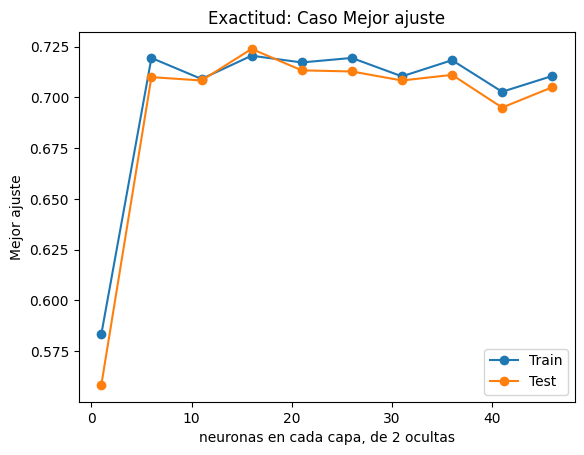

In [60]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Mejor ajuste')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('Mejor ajuste')
plt.show()

Resumen de modelos:

Regresión Logística:

Precisión en prueba: 0.8128

Mejores hiperparámetros: C=0.15, penalty='none', solver='sag'


Red Neuronal (MLP) con 16 neuronas en cada capa oculta:

Precisión en prueba: 0.724

Mejor ajuste encontrado.

# Mejor modelo encontrado (Regresión logística)

In [62]:
# Hacemos predicciones en el conjunto de prueba con el mejor modelo (Regresión Logística)
y_pred_test = best_RL.predict(x_test)

# Generamos la matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Calculamos la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)

# Mostramos los resultados finales
print("Matriz de Confusión (Prueba) para el mejor modelo (Regresión Logística):")
print(conf_matrix_test)
print(f"\nPrecisión final (Prueba): {accuracy_test:.4f}")

Matriz de Confusión (Prueba) para el mejor modelo (Regresión Logística):
[[881 124]
 [213 582]]

Precisión final (Prueba): 0.8128
